In [2]:
import face_recognition
from sklearn.cluster import DBSCAN
import numpy as np
import os

In [3]:
def get_face_encodings_from_images(image_dir):
    # Initialize a list to hold all the face encodings and corresponding filenames
    all_face_encodings = []
    image_filenames = []

    # Loop over all image files in the directory
    for image_filename in os.listdir(image_dir):
        # Construct the full path to the image file
        image_path = os.path.join(image_dir, image_filename)
        # Load the image into memory
        image = face_recognition.load_image_file(image_path)
        
        # Attempt to detect the face and return the encoding
        face_encodings = face_recognition.face_encodings(image)
        
        # If at least one face is detected
        if face_encodings:
            # Append the first face encoding found in the image (assuming one face per image)
            all_face_encodings.append(face_encodings[0])
            image_filenames.append(image_filename)

    return all_face_encodings, image_filenames

In [8]:

def cluster_images_by_face_similarity(face_encodings, image_filenames):
    # Use DBSCAN to cluster faces
    clt = DBSCAN(metric="euclidean", n_jobs=-1)
    clt.fit(face_encodings)

    # Create a dictionary to hold the clusters and noise/outlier group
    face_clusters = {}
    noise = []

    # Loop over the face encodings
    for (encoding, label, image_filename) in zip(face_encodings, clt.labels_, image_filenames):
        if label == -1:
            # Handle noise/outliers
            noise.append(image_filename)
        else:
            # Check if the cluster label exists in the dictionary
            if label not in face_clusters:
                face_clusters[label] = []
            # Add the image filename to its corresponding cluster
            face_clusters[label].append(image_filename)

    return face_clusters, noise

In [9]:
clusters, noise_images = cluster_images_by_face_similarity(face_encodings, image_filenames)

# Print out clusters and their corresponding image filenames
for label, image_filenames in clusters.items():
    print(f"Cluster {label}:")
    for image_filename in image_filenames:
        print(f" - {image_filename}")

# Print out the noise/outlier images
print("Noise/Outlier images:")
for image_filename in noise_images:
    print(f" - {image_filename}")



Cluster 0:
 - _ANI7998.JPG
 - _ANI7999.JPG
 - _ANI7989.JPG
 - _ANI8141.JPG
 - _ANI8142.JPG
 - _ANI8150.JPG
 - _ANI8151.JPG
Cluster 1:
 - _ANI7755.JPG
 - _ANI7756.JPG
 - _ANI7793.JPG
 - _ANI7925.JPG
 - _ANI7926.JPG
 - _ANI7923.JPG
 - _ANI7922.JPG
 - _ANI7921.JPG
Cluster 2:
 - _ANI7804.JPG
 - _ANI7791.JPG
 - _ANI7816.JPG
 - _ANI7792.JPG
 - _ANI7817.JPG
 - _ANI7818.JPG
Cluster 3:
 - _ANI8504.JPG
 - _ANI8502.JPG
 - _ANI8503.JPG
 - _ANI8358.JPG
 - _ANI8357.JPG
 - _ANI8356.JPG
Cluster 4:
 - _ANI0613.JPG
 - _ANI0767.JPG
 - _ANI0766.JPG
 - _ANI0612.JPG
 - _ANI0611.JPG
 - _ANI0312.JPG
 - _ANI0313.JPG
 - _ANI0329.JPG
 - _ANI0330.JPG
 - _ANI0331.JPG
 - _ANI0081.JPG
 - _ANI0083.JPG
 - _ANI0082.JPG
 - _ANI0179.JPG
 - _ANI0180.JPG
 - _ANI0181.JPG
Cluster 5:
 - _ANI7988.JPG
 - _ANI8000.JPG
 - _ANI8144(1).JPG
 - _ANI8143.JPG
 - _ANI8144.JPG
 - _ANI8143(1).JPG
 - _ANI7987.JPG
Noise/Outlier images:
 - _ANI8060.JPG
 - _ANI7757.JPG
 - _ANI7802.JPG
 - _ANI0448.JPG
 - _ANI0885.JPG
 - _ANI7912.JPG
 - _ANI088

In [14]:
import matplotlib.pyplot as plt

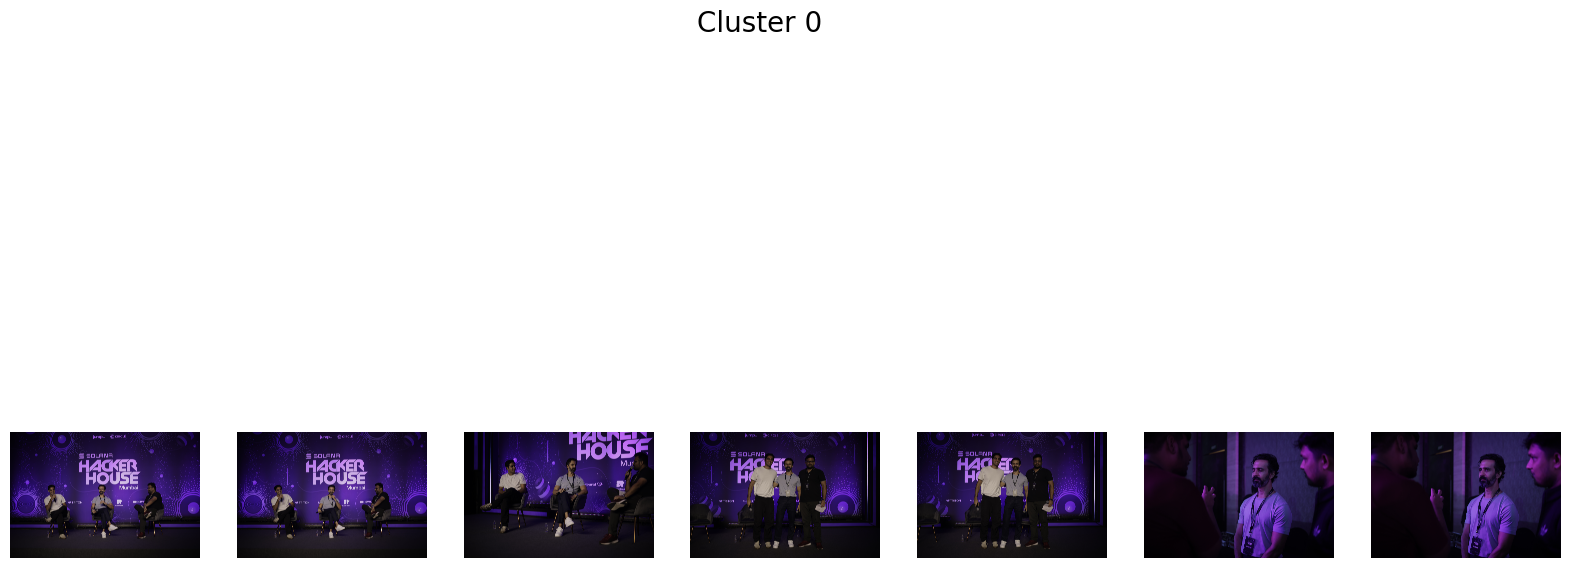

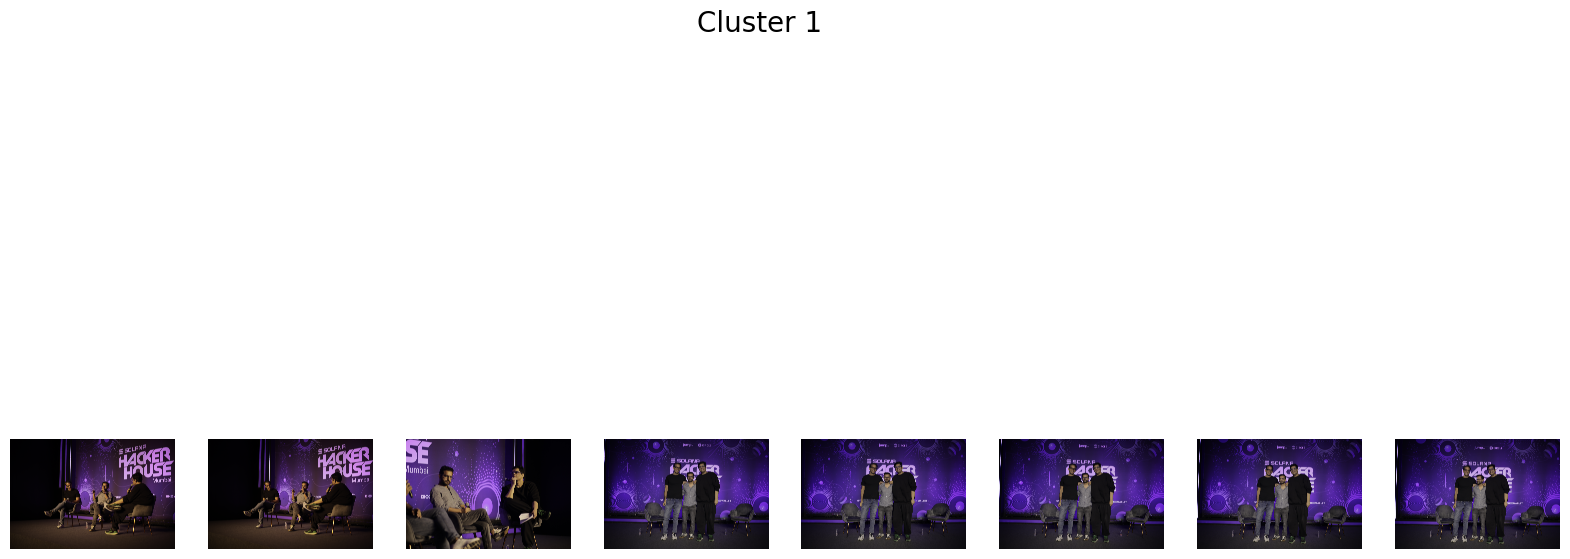

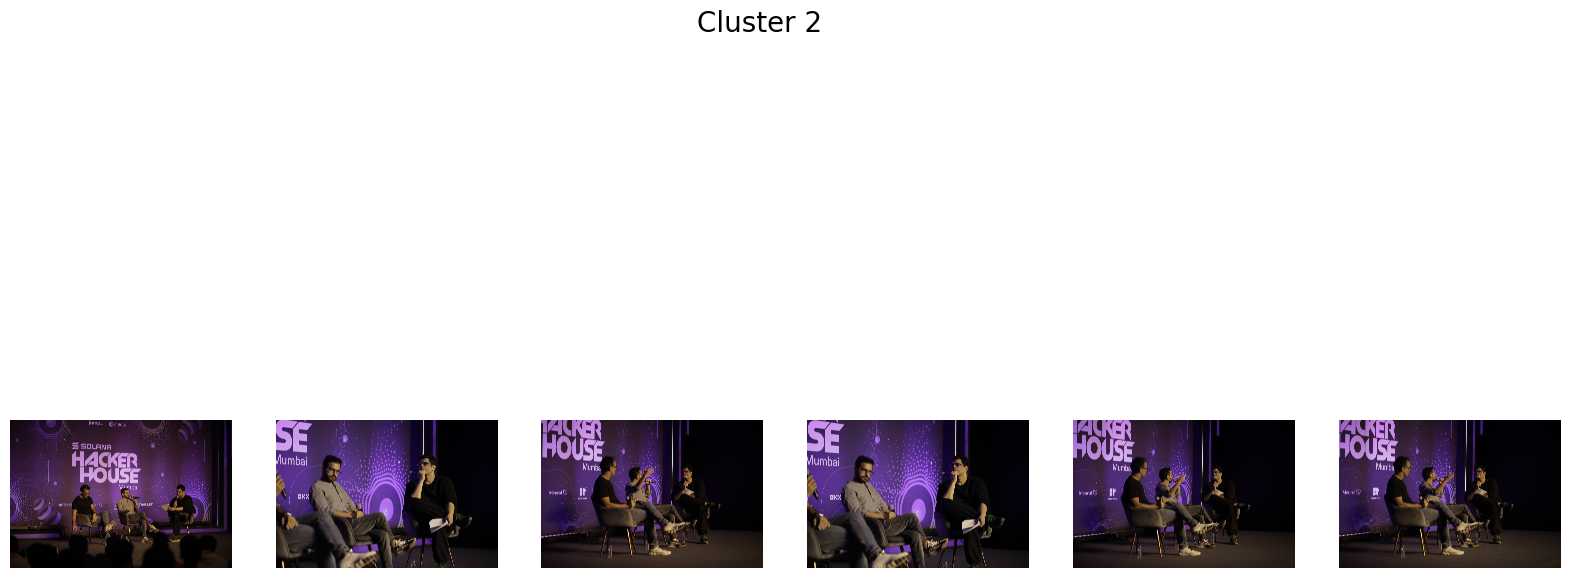

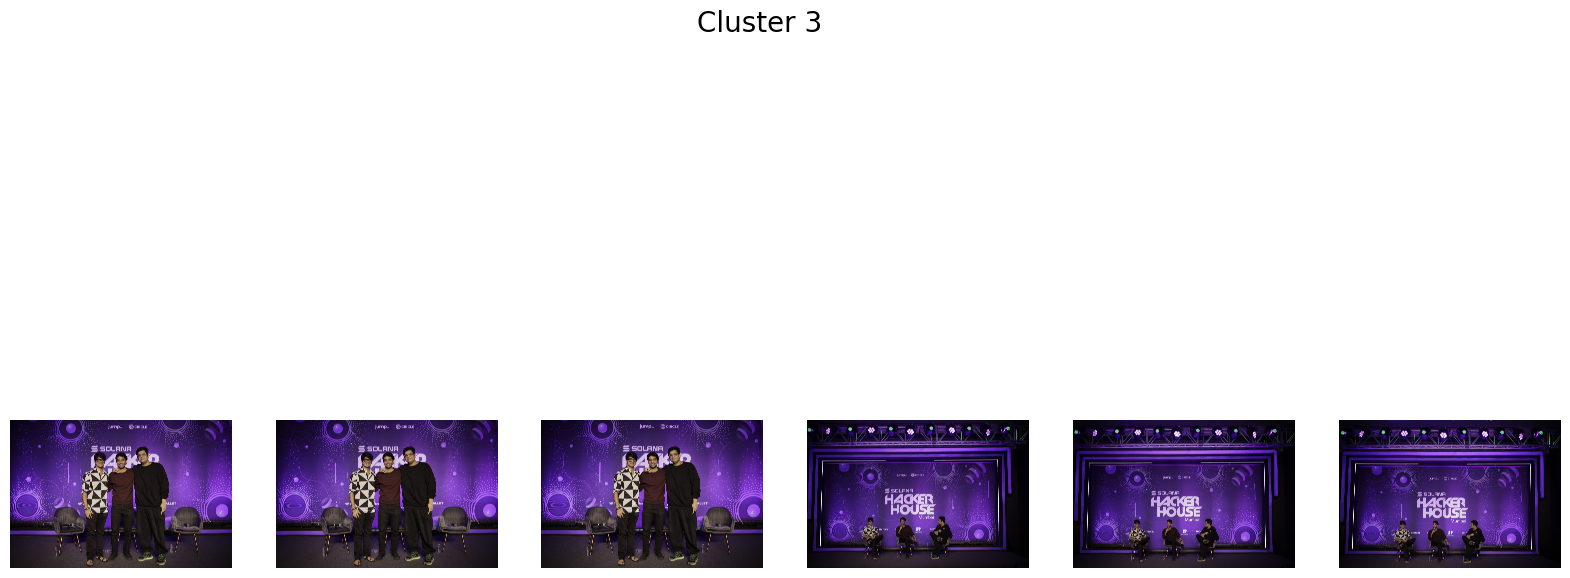

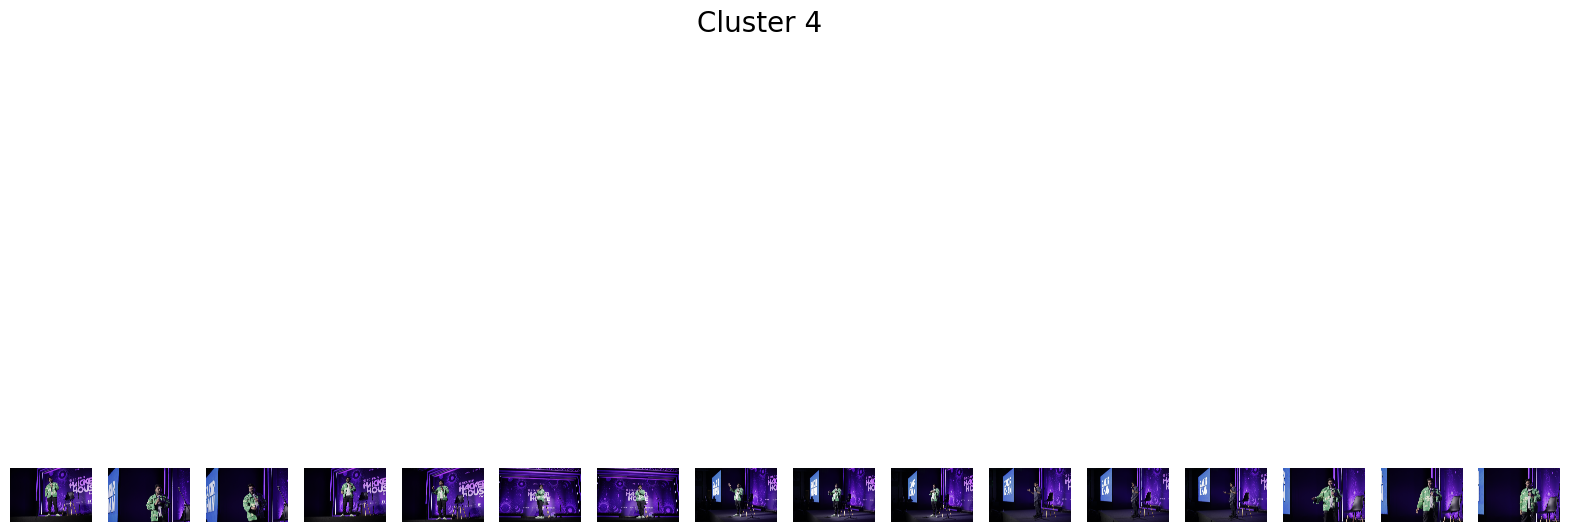

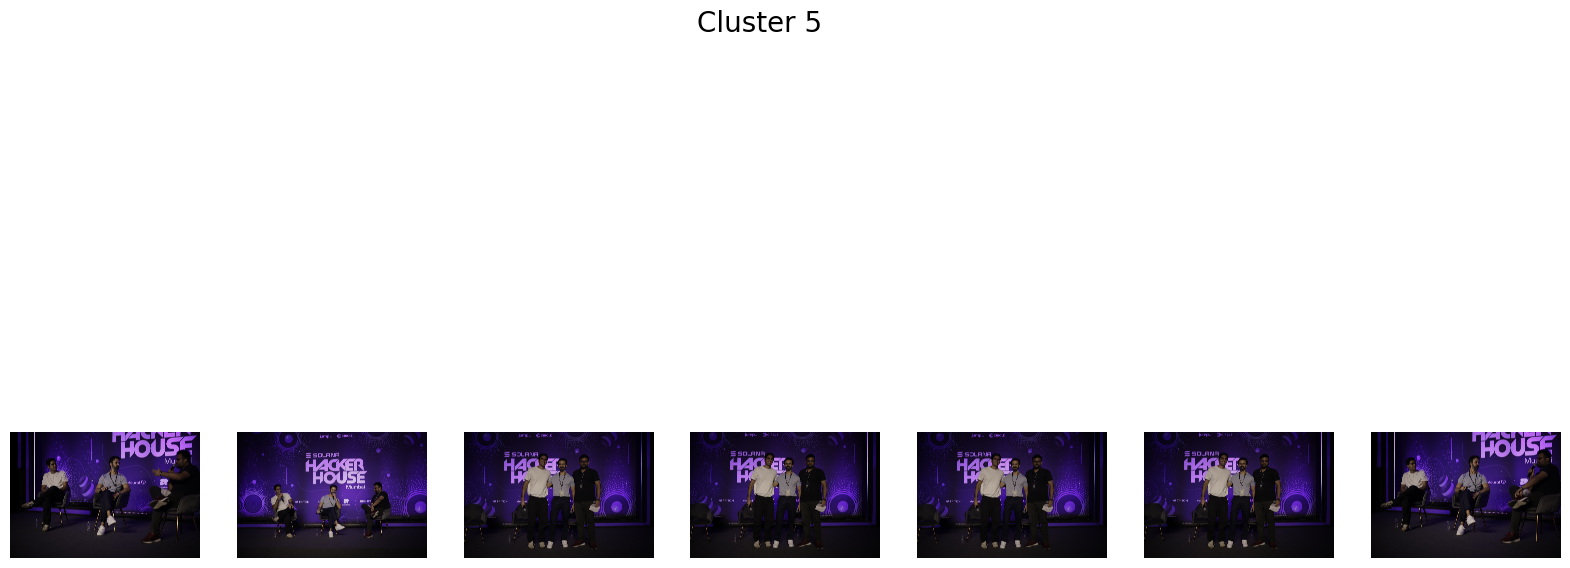

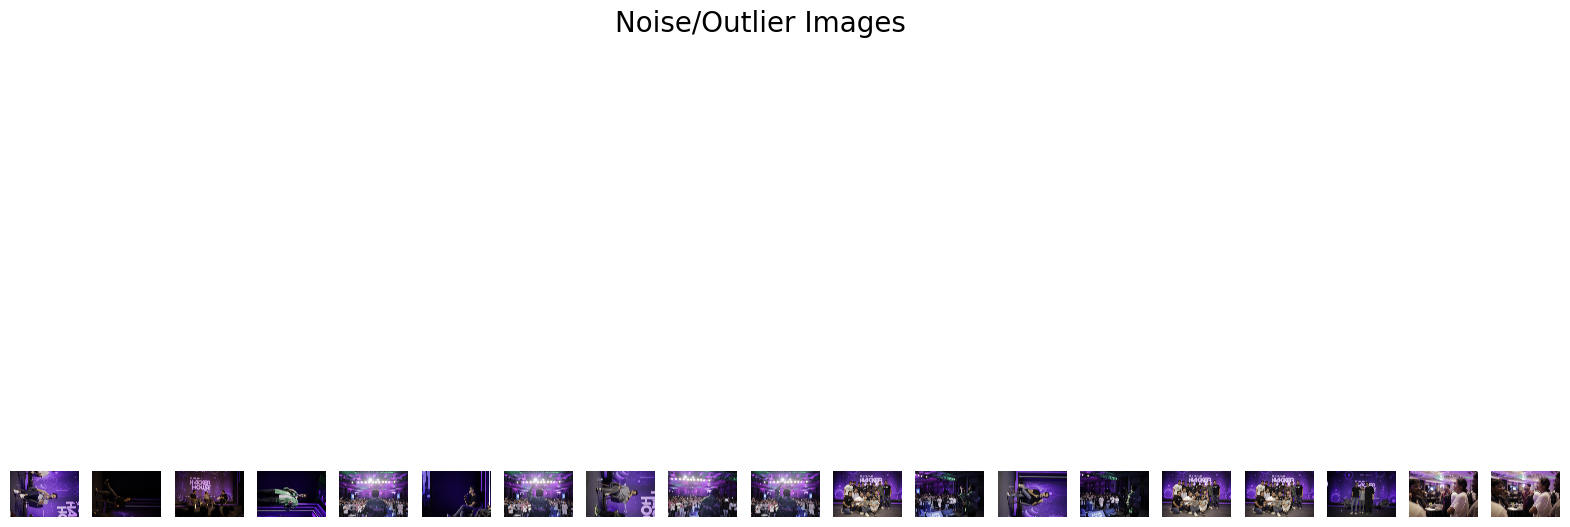

In [16]:
def show_images_in_clusters(clusters, noise_images):
    for cluster_label, image_paths in clusters.items():
        # Create a figure for each cluster
        plt.figure(figsize=(20, 10))
        plt.suptitle(f'Cluster {cluster_label}', fontsize=20)
        
        # Plot each image in the cluster
        for i, image_path in enumerate(image_paths):
            img = face_recognition.load_image_file('pics/' + image_path)
            plt.subplot(1, len(image_paths), i + 1)
            plt.imshow(img)
            plt.axis('off')
        
        # Show the cluster of images
        plt.show()

    # Optionally, show the noise images
    if noise_images:
        plt.figure(figsize=(20, 10))
        plt.suptitle('Noise/Outlier Images', fontsize=20)
        for i, image_path in enumerate(noise_images):
            img = face_recognition.load_image_file('pics/' + image_path)
            plt.subplot(1, len(noise_images), i + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

# Example usage:
show_images_in_clusters(clusters, noise_images)